# **Figure SI-7**

### Program: 
[Jupyter notebook] (Python 3)

### Input: 
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset33] ()
> c_2017_MH0170_5_vals_133to137_'date'_1.csv <br> 
c_2017_MH0170_5_vals_138to140_'date'_1.csv <br>
c_2017_MH0170_5_vals_141to142_'date'_1.csv <br>
c_2017_MH0170_5_vals_143to145_'date'_1.csv <br>
c_2017_MH0170_5_vals_146to148_'date'_1.csv <br>
c_2017_MH0170_5_vals_149to150_'date'_1.csv <br> <br>
c_2017_SKA2102_8_vals_190to191_'date'_1.csv <br>
c_2017_SKA2102_8_vals_192to193_'date'_1.csv <br>
c_2017_SKA2102_8_vals_194to195_'date'_1.csv <br>
c_2017_SKA2102_8_vals_196to198_'date'_1.csv <br>
c_2017_SKA2102_8_vals_199to202_'date'_1.csv <br>
c_2017_SKA2102_8_vals_203only_'date'_1.csv <br>
c_2017_SKA2102_8_vals_204to207_'date'_1.csv <br>
c_2017_SKA2102_8_vals_208to212_'date'_1.csv <br>
c_2017_SKA2102_8_vals_213to215_'date'_1.csv <br>
c_2017_SKA2102_8_vals_216to217_'date'_1.csv <br>
c_2017_SKA2102_8_vals_218to219_'date'_1.csv <br>
c_2017_SKA2102_8_vals_220to222_'date'_1.csv 

### Steps:
- follow script below

### Output:
- Figure SI-7, type = .svg or .pdf, [FigureSI7] ()
> FigureSI7_'date'_MH0170_0 <br>
FigureSI7_'date'_SKA2102_0 <br>

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- Figure layout and extra labels were accomplished in Illustrator or Inkscape

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
##standards for figures

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [33]:
import tables
from scipy import ndimage
import imageio
import numpy as np
import pandas as pd
import os
import scipy.misc
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib.pyplot import cm

In [58]:
##Choose the sample to plot
#sample_name = 'MH0170'
sample_name = 'SKA2102'

In [59]:
##enter the figure name here that will be the filename for the image of the figure output below
FIG_name = 'FigureSI7_20190606_%s_' %(sample_name) ## underscore at end to allow indexing when saving below
FIG_name

'Figure5_20190606_SKA2102_'

Go to directory with sample data...

In [60]:
pwd

'C:\\Users\\Presentatie\\Desktop\\ALESSA_XANES\\07_manuscript\\figures_2019version\\dataset_33'

In [61]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\07_manuscript\figures_2019version


In [62]:
cd /Users/Presentatie/Desktop/ALESSA_XANES/07_manuscript/figures_2019version/dataset_33/

C:\Users\Presentatie\Desktop\ALESSA_XANES\07_manuscript\figures_2019version\dataset_33


In [63]:
files = sorted(glob('*{}_*.csv'.format(sample_name)))
files

['c_2017_SKA2102_8_vals_190to191_20190522_1.csv',
 'c_2017_SKA2102_8_vals_192to193_20190522_1.csv',
 'c_2017_SKA2102_8_vals_194to195_20190522_1.csv',
 'c_2017_SKA2102_8_vals_196to198_20190522_1.csv',
 'c_2017_SKA2102_8_vals_199to202_20190522_1.csv',
 'c_2017_SKA2102_8_vals_203only_20190522_1.csv',
 'c_2017_SKA2102_8_vals_204to207_20190522_1.csv',
 'c_2017_SKA2102_8_vals_208to212_20190522_1.csv',
 'c_2017_SKA2102_8_vals_213to215_20190522_1.csv',
 'c_2017_SKA2102_8_vals_216to217_20190522_1.csv',
 'c_2017_SKA2102_8_vals_218to219_20190522_1.csv',
 'c_2017_SKA2102_8_vals_220to222_20190522_1.csv']

In [64]:
sample_names = [i.split('_', 4)[2] for i in files]
sample_name = sample_names[0] ##doesn't matter which
sample_name

'SKA2102'

In [65]:
files_cut = [i[:-6] for i in files]  ##cuts off 6 characters from the end
files_cut

['c_2017_SKA2102_8_vals_190to191_20190522',
 'c_2017_SKA2102_8_vals_192to193_20190522',
 'c_2017_SKA2102_8_vals_194to195_20190522',
 'c_2017_SKA2102_8_vals_196to198_20190522',
 'c_2017_SKA2102_8_vals_199to202_20190522',
 'c_2017_SKA2102_8_vals_203only_20190522',
 'c_2017_SKA2102_8_vals_204to207_20190522',
 'c_2017_SKA2102_8_vals_208to212_20190522',
 'c_2017_SKA2102_8_vals_213to215_20190522',
 'c_2017_SKA2102_8_vals_216to217_20190522',
 'c_2017_SKA2102_8_vals_218to219_20190522',
 'c_2017_SKA2102_8_vals_220to222_20190522']

In [66]:
##to get scan range for each imported file, that was used in the average
scans = [i.split('_', 5)[-1] for i in files_cut]  ##full scan range
first_scan = [i[0:3] for i in scans]  ##gets the first scan of each average
first_scan

['190',
 '192',
 '194',
 '196',
 '199',
 '203',
 '204',
 '208',
 '213',
 '216',
 '218',
 '220']

In [67]:
##read in csv or txt files (in the following case, tab-delimited)
##be sure it matches the files you are interested in importing
frames = [ pd.read_csv(name, delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean']) for name in glob('c_2017_%s_*.csv' %(sample_name)) ]
all_data = pd.concat(frames, axis=1)
all_data.index.name = 'energy eV'
all_data.columns = ['s{}'.format(x) for x in first_scan]
all_data
#frames

,s190,s192,s194,s196,s199,s203,s204,s208,s213,s216,s218,s220
energy eV,,,,,,,,,,,,
2460.09,0.001249,0.004363,-0.001787,-0.006003,0.002845,0.004873,0.000862,0.003351,-0.009126,-0.007438,-0.001222,-0.002513
2460.28,-0.003088,-0.004375,0.000897,-0.005966,-0.005479,-0.008577,-0.003190,-0.003264,-0.002250,-0.010713,-0.011000,-0.005606
2460.47,-0.002925,-0.003975,-0.005814,0.004955,0.006380,-0.008577,-0.005651,0.007762,-0.002614,0.009284,-0.004848,0.004692
2460.66,-0.005769,0.002183,-0.008538,-0.005214,-0.004494,-0.008577,-0.003814,-0.005354,-0.002531,-0.011601,-0.001389,-0.002582
2460.85,0.002643,-0.010118,-0.007302,-0.007488,0.001395,-0.008185,0.004095,-0.003599,-0.006241,-0.003609,-0.002143,-0.000792
2461.04,-0.001840,-0.001661,-0.002707,-0.004454,-0.004155,-0.002292,-0.007178,0.001473,-0.011215,-0.006211,-0.001481,-0.003981
2461.23,-0.000128,-0.002923,0.004182,-0.005831,-0.002571,0.003683,0.000820,-0.001783,-0.002237,0.015281,0.005632,0.001604
2461.42,-0.008364,0.002422,-0.002996,0.004162,-0.002557,-0.003920,0.002432,-0.005580,-0.000572,0.009577,-0.006753,0.004791
2461.61,-0.007777,-0.000242,0.005310,0.005111,-0.005279,0.009220,0.004166,-0.000047,0.000999,-0.010144,-0.002470,0.006294


In [68]:
all_data.shape[1] ##number of particles considered

12

In [71]:
##Choose appropriate sample
##lists the order of columns to arrange in waterfall plot

##for sample MH0170
#all_data_re = all_data[['s143', 's138', 's149', 's141', 's146', 's133']]

##for sample SKA2102
all_data_re = all_data[['s204', 's218', 's220', 's216', 's203', 's213', 's196', 's190', 's192', 's199', 's208', 's194']]

In [ ]:
pwd

In [ ]:
cd ..

In [ ]:
cd /Users/Presentatie/Desktop/ALESSA_XANES/07_manuscript/figures_2019version/Figure_SI7/

In [72]:
##standards for publication figures

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

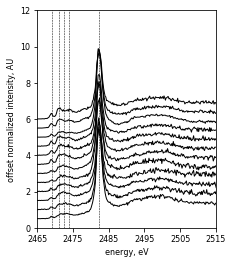

In [73]:
##waterwall plotting
##full figure (publication size)
figsize(3.2,4)

offset = 0 #giving offset a start value
n = all_data.shape[1] #number of columns in dataframe is the number of colors needed
color = iter(cm.seismic_r(np.linspace(0.8,1,n))) #assigning the colormap type to be iterated over the number of columns
    #cm... is the name of the colormap; put '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html
    
#waterfall maker
for name in all_data_re:
    offset = offset+0.5   ##CHOOSE Y OFFSET HERE
    #c = next(color)
    #plt.scatter(all_data.index, all_data[name]+offset, marker='.', s=18, label=name, c = c)
    plt.plot(all_data.index, all_data_re[name]+offset, c = 'k', linewidth = 1)
    
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('XANES')
plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,12)
xticks(np.arange(2465,2515.001, step=10))

axvline(2469.0, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2471.2, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2472.5, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2473.8, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2482.2, linewidth = 0.5, linestyle = '--', color = 'k')

##saving figure as a tif with index so can change formatting of colors etc without overwriting
i = 0
while os.path.exists('{}{:d}.tif'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.tif'.format(FIG_name, i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{:d}.pdf'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.pdf'.format(FIG_name, i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{:d}.svg'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.svg'.format(FIG_name, i), bbox_inches = 'tight')


#SIMPLE# #plt.savefig('%s.tif' %(FIG_name), bbox_inches = 'tight')

#??#plt.ylim(0, [max(df[filename])+1000])    #how do I get this part to work??
plt.show()

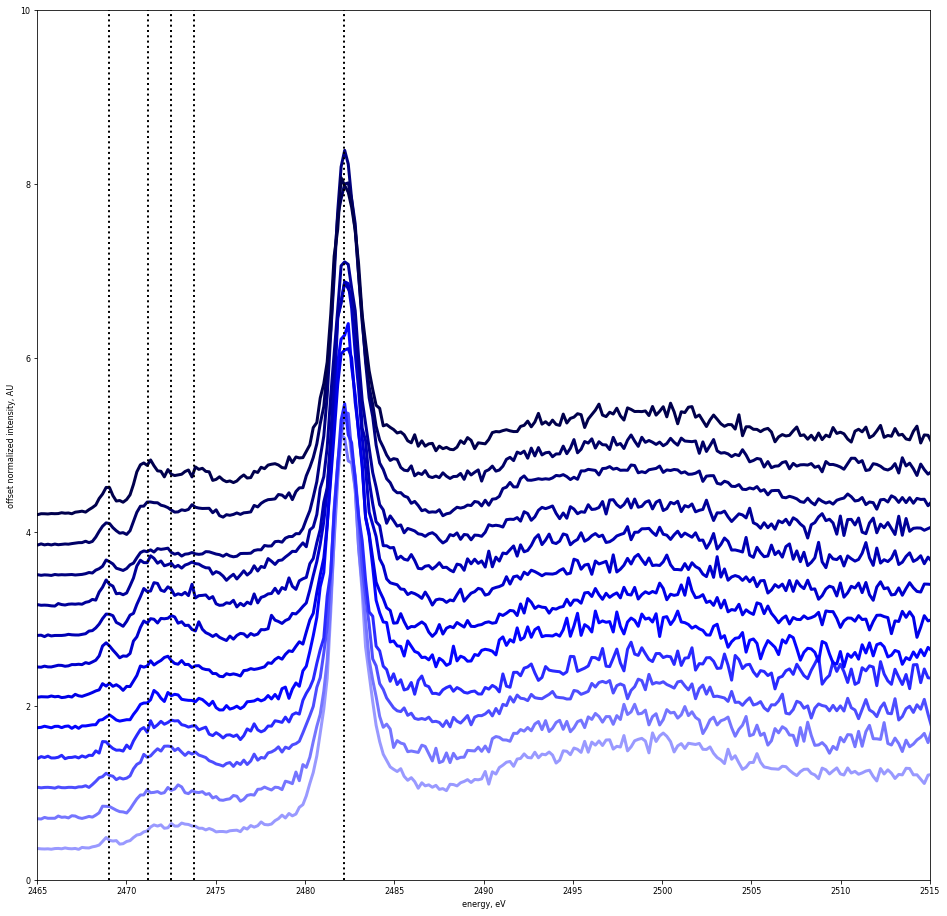

In [74]:
##waterwall plotting, bigger, just to see
plt.figure(figsize=(16,16))

offset = 0 #giving offset a start value
n = all_data.shape[1] #number of columns in dataframe is the number of colors needed
color = iter(cm.seismic_r(np.linspace(0.6,1,n))) #assigning the colormap type to be iterated over the number of columns
    #cm... is the name of the colormap; put '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html
    
#waterfall maker
for name in all_data_re:
    offset = offset+0.35   ##CHOOSE Y OFFSET HERE
    c = next(color)
    #plt.scatter(all_data.index, all_data[name]+offset, marker='.', s=18, label=name, c = c)
    plt.plot(all_data.index, all_data_re[name]+offset, c = c, linewidth = 3)
    
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('XANES')
plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,10)
xticks(np.arange(2465,2515.001, step=5))

axvline(2469.0, linewidth = 2, linestyle = ':', color = 'k')
axvline(2471.2, linewidth = 2, linestyle = ':', color = 'k')
axvline(2472.5, linewidth = 2, linestyle = ':', color = 'k')
axvline(2473.8, linewidth = 2, linestyle = ':', color = 'k')
axvline(2482.2, linewidth = 2, linestyle = ':', color = 'k')


# ##saving figure as a tif with index so can change formatting of colors etc without overwriting
# i = 0
# while os.path.exists('{}{:d}.tif'.format(FIG_name, i)):
#     i += 1
# plt.savefig('{}{:d}.tif'.format(FIG_name, i), bbox_inches = 'tight')

# i = 0
# while os.path.exists('{}{:d}.pdf'.format(FIG_name, i)):
#     i += 1
# plt.savefig('{}{:d}.pdf'.format(FIG_name, i), bbox_inches = 'tight')

# i = 0
# while os.path.exists('{}{:d}.svg'.format(FIG_name, i)):
#     i += 1
# plt.savefig('{}{:d}.svg'.format(FIG_name, i), bbox_inches = 'tight')



#SIMPLE# #plt.savefig('%s.tif' %(FIG_name), bbox_inches = 'tight')

#??#plt.ylim(0, [max(df[filename])+1000])    #how do I get this part to work??
plt.show()

### end